# Plot parameter distributions from historical and modern calibration

In [1]:
import os, json
import numpy as np
import pandas as pd
import xarray as xr
from scipy.stats import norm, gaussian_kde
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'medium'
plt.rcParams['legend.fontsize'] = 12


Get optimal parameters

In [3]:
# locate optimal parameters
kenn_opt_params_fp = '/Users/albinwells/Desktop/PyGEM-docs/Output/simulations/opt_params/kenn_opt_params.csv'
root_opt_params_fp = '/Users/albinwells/Desktop/PyGEM-docs/Output/simulations/opt_params/root_opt_params.csv'

kenn_opt_params_df = pd.read_csv(kenn_opt_params_fp)
root_opt_params_df = pd.read_csv(root_opt_params_fp)


In [4]:
# kennicott optimal parameters
kenn_opt_kp = kenn_opt_params_df.kp.values
kenn_opt_tbias = kenn_opt_params_df.tbias.values
kenn_opt_ddfsnow = kenn_opt_params_df.ddfsnow.values

# root optimal parameters
root_opt_kp = root_opt_params_df.kp.values
root_opt_tbias = root_opt_params_df.tbias.values
root_opt_ddfsnow = root_opt_params_df.ddfsnow.values


Optimal parameters from Rounce et al. (2023)

In [5]:
# Rounce et al. (2023) Science paper parameters
glac_nos = [1.15645, 1.26722]
prms_list = []
for glac_no in glac_nos:
    prms_path  =f'rounce_param_chains/{glac_no}-modelprms_dict.json'
    if os.path.isfile(prms_path):
        with open(prms_path,'r') as f:
            prms = json.load(f)
            prms_list.append(prms)
            if 'MCMC' in prms.keys():
                print(f'MCMC calibration parameters found for {glac_no}, proceed!')


MCMC calibration parameters found for 1.15645, proceed!
MCMC calibration parameters found for 1.26722, proceed!


In [6]:
### kp ###
# Kennicott
kenn_prms_kp = prms_list[0]['MCMC']['kp']['chain_0']
kde = gaussian_kde(kenn_prms_kp)
kenn_prms_kp_x = np.linspace(min(kenn_prms_kp), max(kenn_prms_kp), 1000)  # Range for the density curve
kenn_prms_kp_y = kde(kenn_prms_kp_x)

# Root
root_prms_kp = prms_list[1]['MCMC']['kp']['chain_0']
kde = gaussian_kde(root_prms_kp)
root_prms_kp_x = np.linspace(min(root_prms_kp), max(root_prms_kp), 1000)  # Range for the density curve
root_prms_kp_y = kde(root_prms_kp_x)

### tbias ###
# Kennicott
kenn_prms_tb = prms_list[0]['MCMC']['tbias']['chain_0']
kde = gaussian_kde(kenn_prms_tb)
kenn_prms_tb_x = np.linspace(min(kenn_prms_tb), max(kenn_prms_tb), 1000)  # Range for the density curve
kenn_prms_tb_y = kde(kenn_prms_tb_x)

# Root
root_prms_tb = prms_list[1]['MCMC']['tbias']['chain_0']
kde = gaussian_kde(root_prms_tb)
root_prms_tb_x = np.linspace(min(root_prms_tb), max(root_prms_tb), 1000)  # Range for the density curve
root_prms_tb_y = kde(root_prms_tb_x)

### ddfsnow ###
# Kennicott
kenn_prms_ddfsnow = np.asarray(prms_list[0]['MCMC']['ddfsnow']['chain_0'])*1e3
kde = gaussian_kde(kenn_prms_ddfsnow)
kenn_prms_ddfsnow_x = np.linspace(min(kenn_prms_ddfsnow), max(kenn_prms_ddfsnow), 1000)  # Range for the density curve
kenn_prms_ddfsnow_y = kde(kenn_prms_ddfsnow_x)

# Root
root_prms_ddfsnow = np.asarray(prms_list[1]['MCMC']['ddfsnow']['chain_0'])*1e3
kde = gaussian_kde(root_prms_ddfsnow)
root_prms_ddfsnow_x = np.linspace(min(root_prms_ddfsnow), max(root_prms_ddfsnow), 1000)  # Range for the density curve
root_prms_ddfsnow_y = kde(root_prms_ddfsnow_x)


Plot results

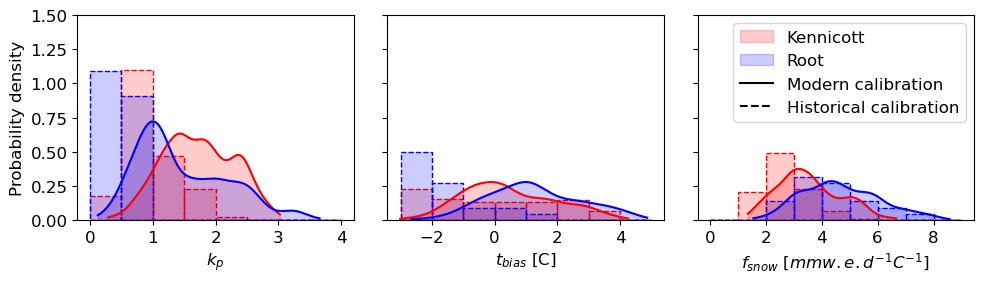

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

# plot histogram of our optimal parameters
bins_kp = np.arange(0,4.5,0.5)
bins_tbias = np.arange(-3,5.5,1)
bins_ddfsnow = np.arange(0,9.5,1)

axs[0].hist(kenn_opt_kp, bins=bins_kp, facecolor='r', edgecolor='none', alpha=0.2, density=True)
axs[0].hist(kenn_opt_kp, bins=bins_kp, facecolor='none', edgecolor='r', linestyle='--', density=True)
axs[0].hist(root_opt_kp, bins=bins_kp, facecolor='b', edgecolor='none', alpha=0.2, density=True)
axs[0].hist(root_opt_kp, bins=bins_kp, facecolor='none', edgecolor='b', linestyle='--', density=True)
axs[1].hist(kenn_opt_tbias, bins=bins_tbias, facecolor='r', edgecolor='none', alpha=0.2, density=True)
axs[1].hist(kenn_opt_tbias, bins=bins_tbias, facecolor='none', edgecolor='r', linestyle='--', density=True)
axs[1].hist(root_opt_tbias, bins=bins_tbias, facecolor='b', edgecolor='none', alpha=0.2, density=True)
axs[1].hist(root_opt_tbias, bins=bins_tbias, facecolor='none', edgecolor='b', linestyle='--', density=True)
axs[2].hist(kenn_opt_ddfsnow, bins=bins_ddfsnow, facecolor='r', edgecolor='none', alpha=0.2, density=True)
axs[2].hist(kenn_opt_ddfsnow, bins=bins_ddfsnow, facecolor='none', edgecolor='r', linestyle='--', density=True)
axs[2].hist(root_opt_ddfsnow, bins=bins_ddfsnow, facecolor='b', edgecolor='none', alpha=0.2, density=True)
axs[2].hist(root_opt_ddfsnow, bins=bins_ddfsnow, facecolor='none', edgecolor='b', linestyle='--', density=True)

# plot the normal distribution (Rounce et al. 2023)
axs[0].plot(kenn_prms_kp_x, kenn_prms_kp_y, color='r')
axs[1].plot(kenn_prms_tb_x, kenn_prms_tb_y, color='r', label='Kennicott')
axs[2].plot(kenn_prms_ddfsnow_x, kenn_prms_ddfsnow_y, color='r')
axs[0].plot(root_prms_kp_x, root_prms_kp_y, color='b')
axs[1].plot(root_prms_tb_x, root_prms_tb_y, color='b', label='Root')
axs[2].plot(root_prms_ddfsnow_x, root_prms_ddfsnow_y, color='b')

axs[0].fill_between(kenn_prms_kp_x, kenn_prms_kp_y, color='r', alpha=0.2)
axs[1].fill_between(kenn_prms_tb_x, kenn_prms_tb_y, color='r', alpha=0.2)
axs[2].fill_between(kenn_prms_ddfsnow_x, kenn_prms_ddfsnow_y, color='r', alpha=0.2, label='Kennicott')
axs[0].fill_between(root_prms_kp_x, root_prms_kp_y, color='b', alpha=0.2)
axs[1].fill_between(root_prms_tb_x, root_prms_tb_y, color='b', alpha=0.2)
axs[2].fill_between(root_prms_ddfsnow_x, root_prms_ddfsnow_y, color='b', alpha=0.2, label='Root')


# labels
axs[2].plot([], [], ls='-', color='k', label='Modern calibration')
axs[2].plot([], [], ls='--', color='k', label='Historical calibration')

axs[2].legend()
axs[0].set_ylim(0,1.5)
axs[0].set_ylabel('Probability density')
axs[0].set_xlabel('$k_p$')
axs[1].set_xlabel('$t_{bias}$ [C]')
axs[2].set_xlabel('$f_{snow}$ [$mm w.e. d^{-1} C^{-1}$]')

plt.tight_layout()
plt.show()
fig.savefig('/Users/albinwells/Desktop/PyGEM-docs/Output/simulations/opt_params/opt_params_fig.png',dpi=300)


# Plot change in ELA over time

In [7]:
# load in historical calibration binned elevation
nc_data_kennh = xr.open_dataset('simulations/gridsearch/rounce_mcmc_from1940/ERA5/binned/1.15645_ERA5_opt_params_mean_1940_2022_binned.nc')
nc_data_rooth = xr.open_dataset('simulations/gridsearch/rounce_mcmc_from1940/ERA5/binned/1.26722_ERA5_opt_params_mean_1940_2022_binned.nc')

# extract data
elas, yearss = [], []
for nc_data in [nc_data_kennh, nc_data_rooth]:     
    years = np.array(nc_data.variables['year'][:])
    bin_z = np.array(nc_data.variables['bin_surface_h_initial'][:][0])
    bin_massbalclim_annual = np.array(nc_data.variables['bin_massbalclim_annual'][:][0])

    # interpolate values to equal bins
    elas_yr, years_yr = [], []
    for i, yr in enumerate(years):
        cmb_yr = interp1d(bin_z, bin_massbalclim_annual[:,i],  kind='linear', fill_value='extrapolate')
        bin_z_full = np.arange(round(np.min(bin_z)), np.max(bin_z), 5)
        cmb_yr_full = cmb_yr(bin_z_full)

        # calculate ELA for each year
        ela_i = np.where(np.diff(np.sign(cmb_yr_full)))[0]
        if len(ela_i) == 0:
            continue
        else:
            assert len(ela_i) == 2, 'Caution: more than two mass balance +/- crossings'
            ela_i = ela_i[1] # take the 2nd crossing (first one is at the terminus)
            ela_z_annual = bin_z_full[ela_i]
            elas_yr.append(ela_z_annual)
            years_yr.append(yr)

    elas.append(np.array(elas_yr))
    yearss.append(np.array(years_yr))
    

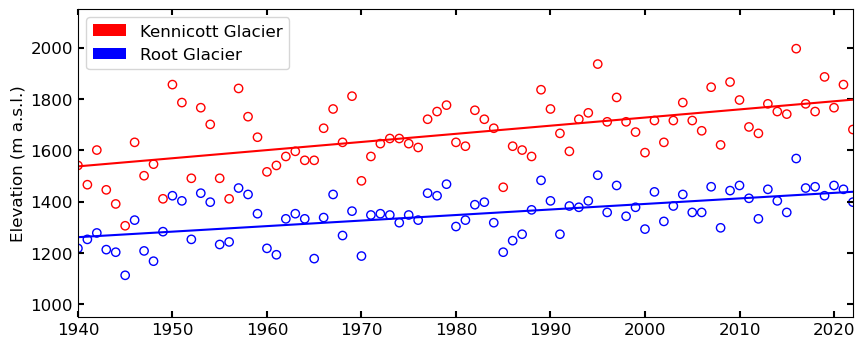

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex='col', sharey='row')

# plot Kennicott and Root
ax.scatter(yearss[0], elas[0], ec='r', fc='none', marker='o')
ax.scatter(yearss[1], elas[1], ec='b', fc='none', marker='o')

# add linear trend
m0, b0 = np.polyfit(yearss[0], elas[0], 1)
m1, b1 = np.polyfit(yearss[1], elas[1], 1)
ax.plot(yearss[0], m0*yearss[0] + b0, color='r', ls='-')
ax.plot(yearss[1], m1*yearss[1] + b1, color='b', ls='-')

# add labels
ax.bar([0], [0], color='r', label='Kennicott Glacier')
ax.bar([0], [0], color='b', label='Root Glacier')
ax.set_ylabel('Elevation (m a.s.l.)')
ax.set_ylim(950,2150)
ax.set_xlim(1940, 2022)
ax.tick_params(which='both', direction='in', top=True, right=True, left=True, bottom=True, length=4, width=1.5)
ax.legend(fontsize=12)

plt.show()
plt.tight_layout()
fig.savefig('ela_migration_past.png', dpi=300)

Repeat with future data

In [9]:
# Rounce PyGEM output
rgi_regions = ['1']*8
rgi_glacs = ['26722']*8 # Kennicott (15645), Root (26722)
gcms = ['CESM2', 'CESM2-WACCM', 'BCC-CSM2-MR', 'EC-EARTH3', 'EC-EARTH3-Veg', 'FGOALS-f3-L',
        'GFDL-ESM4', 'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-MM']
scenarios = ['ssp126', 'ssp245', 'ssp370', 'ssp585']*1


In [10]:
# load in historical calibration binned elevation
elas_kenn, yearss_kenn, elas_root, yearss_root = [], [], [], []
for ssp in scenarios:
    elas_kenn_ssp, yearss_kenn_ssp, elas_root_ssp, yearss_root_ssp = [], [], [], []
    for gcm in gcms:
        kenn_fp = f'simulations/gridsearch/rounce_mcmc_from2000/{gcm}/{ssp}/binned/1.15645_{gcm}_{ssp}_opt_params_mean_2000_2100_binned.nc'
        root_fp = f'simulations/gridsearch/rounce_mcmc_from2000/{gcm}/{ssp}/binned/1.26722_{gcm}_{ssp}_opt_params_mean_2000_2100_binned.nc'
        nc_data_kennh = xr.open_dataset(kenn_fp)
        nc_data_rooth = xr.open_dataset(root_fp)
        
        # extract data
        for glac, nc_data in zip(['Kenn', 'Root'], [nc_data_kennh, nc_data_rooth]):     
            years = np.array(nc_data.variables['year'][:])
            bin_z = np.array(nc_data.variables['bin_surface_h_initial'][:][0])
            bin_massbalclim_annual = np.array(nc_data.variables['bin_massbalclim_annual'][:][0])
        
            # interpolate values to equal bins
            elas_yr, years_yr = [], []
            for i, yr in enumerate(years):
                cmb_yr = interp1d(bin_z, bin_massbalclim_annual[:,i],  kind='linear', fill_value='extrapolate')
                bin_z_full = np.arange(round(np.min(bin_z)), np.max(bin_z), 5)
                cmb_yr_full = cmb_yr(bin_z_full)
        
                # calculate ELA for each year
                ela_i = np.where(np.diff(np.sign(cmb_yr_full)))[0]
                if len(ela_i) == 0:
                    continue
                else:
                    if len(ela_i) > 2:
                        print('Caution: more than two mass balance +/- crossings (indices):', ela_i) 
                    ela_i = ela_i[-1] # take the 2nd crossing (first one is at the terminus)
                    ela_z_annual = bin_z_full[ela_i]
                    elas_yr.append(ela_z_annual)
                    years_yr.append(yr)

            # add list for each GCM
            if glac == 'Kenn':
                elas_kenn_ssp.append(np.array(elas_yr))
                yearss_kenn_ssp.append(np.array(years_yr))
            elif glac == 'Root':
                elas_root_ssp.append(np.array(elas_yr))
                yearss_root_ssp.append(np.array(years_yr))
            
    # add list for each ssp (length 4, each list has 12 GCMs)
    elas_kenn.append(elas_kenn_ssp)
    yearss_kenn.append(yearss_kenn_ssp)
    elas_root.append(elas_root_ssp)
    yearss_root.append(yearss_root_ssp)
    

Caution: more than two mass balance +/- crossings (indices): [ 71  81  84 334]
Caution: more than two mass balance +/- crossings (indices): [ 71  79  84 337]
Caution: more than two mass balance +/- crossings (indices): [ 71  79  84 331]
Caution: more than two mass balance +/- crossings (indices): [ 71  79  87 336]
Caution: more than two mass balance +/- crossings (indices): [ 71  79  87 347]
Caution: more than two mass balance +/- crossings (indices): [ 71  79  90 350]
Caution: more than two mass balance +/- crossings (indices): [ 71  77  93 346]
Caution: more than two mass balance +/- crossings (indices): [ 71  77  93 368]
Caution: more than two mass balance +/- crossings (indices): [ 71  77  96 353]
Caution: more than two mass balance +/- crossings (indices): [ 71  77 106 325]
Caution: more than two mass balance +/- crossings (indices): [ 71  77 106 323]
Caution: more than two mass balance +/- crossings (indices): [ 71  77 106 366]
Caution: more than two mass balance +/- crossings (i

In [11]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['royalblue', 'teal', 'gold', 'darkorange', 'firebrick']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)


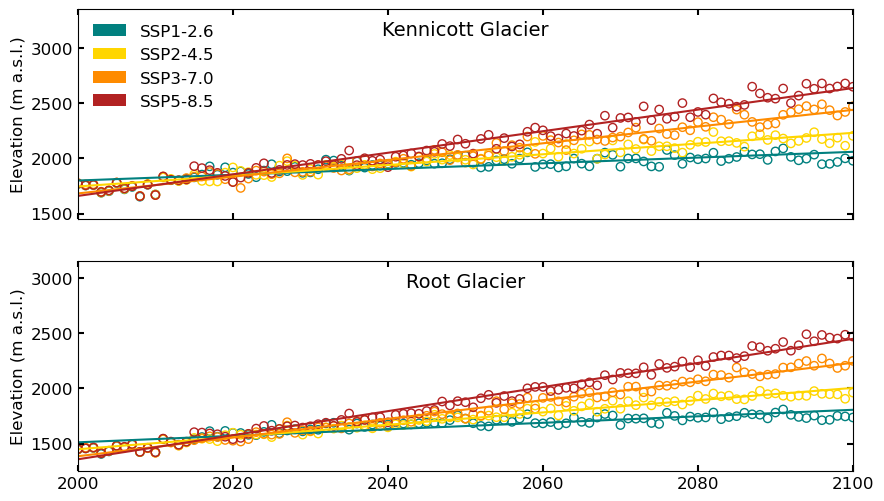

<Figure size 640x480 with 0 Axes>

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex='col', sharey='row')
ax0, ax1 = axs

# plot Kennicott
for i, (elas, yearss) in enumerate(zip(elas_kenn, yearss_kenn)):
    yearss_mean = np.mean(yearss, axis=0)
    elas_mean = np.mean(elas, axis=0)
    ax0.scatter(yearss_mean, elas_mean, ec=cmap((i+1)/4), fc='none', marker='o', lw=1.0, alpha=1.0)
    # ax0.scatter(np.array(yearss).flatten(), np.array(elas).flatten(), ec=cmap((i+1)/4), fc='none', marker='o', lw=0.5, alpha=0.5)
    m0, b0 = np.polyfit(yearss_mean, elas_mean, 1)
    ax0.plot(yearss_mean, m0*yearss_mean + b0, color=cmap((i+1)/4), ls='-')

# plot Root
for i, (elas, yearss) in enumerate(zip(elas_root, yearss_root)):
    yearss_mean = np.mean(yearss, axis=0)
    elas_mean = np.mean(elas, axis=0)
    ax1.scatter(yearss_mean, elas_mean, ec=cmap((i+1)/4), fc='none', marker='o', lw=1.0, alpha=1.0)
    # ax0.scatter(np.array(yearss).flatten(), np.array(elas).flatten(), ec=cmap((i+1)/4), fc='none', marker='o', lw=0.5, alpha=0.5)
    m0, b0 = np.polyfit(yearss_mean, elas_mean, 1)
    ax1.plot(yearss_mean, m0*yearss_mean + b0, color=cmap((i+1)/4), ls='-')


ax0.annotate('Kennicott Glacier', xy=(0.5,0.95), xycoords='axes fraction', ha='center', va='top', fontsize=14)
ax1.annotate('Root Glacier', xy=(0.5,0.95), xycoords='axes fraction', ha='center', va='top', fontsize=14)

scenarios_lab = ['SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5']
for i in range(4):
    ax0.bar([0], [0], color=cmap((i+1)/4), label=scenarios_lab[i])

# add labels
ax0.set_ylabel('Elevation (m a.s.l.)')
ax1.set_ylabel('Elevation (m a.s.l.)')
ax0.set_ylim(1450, 3350)
ax1.set_ylim(1250, 3150)
ax1.set_xlim(2000, 2100)
ax0.tick_params(which='both', direction='in', top=True, right=True, left=True, bottom=True, length=4, width=1.5)
ax1.tick_params(which='both', direction='in', top=True, right=True, left=True, bottom=True, length=4, width=1.5)
ax0.legend(fontsize=12, frameon=False)

plt.show()
plt.tight_layout()
fig.savefig('ela_migration_future.png', dpi=300)